<a href="https://colab.research.google.com/github/anhthu54/CreditCardFraud/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('creditcard.csv')

#Data exploration

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


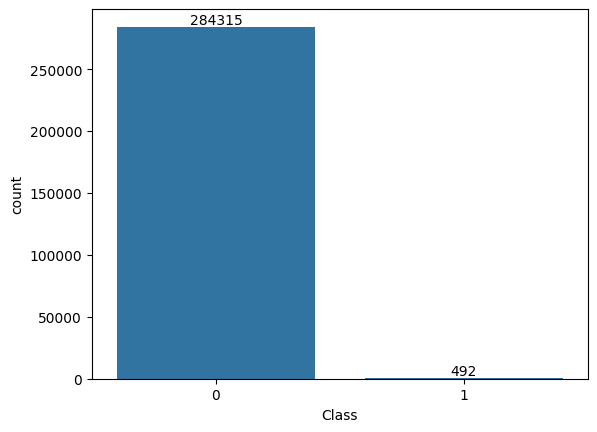

In [ ]:
ax = sns.countplot(x='Class', data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [ ]:
print("The percentage of Non-fraud class is", round((df['Class'].value_counts()[0]/len(df)) * 100,2),"%")
print("The percentage of Fraud class is", round((df['Class'].value_counts()[1]/len(df))*100,2),"%")

The percentage of Non-fraud class is 99.83 %
The percentage of Fraud class is 0.17 %


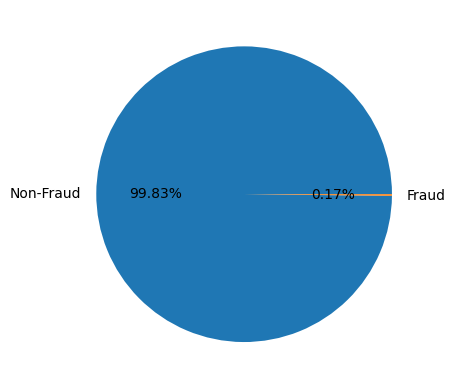

In [ ]:
plt.pie(df['Class'].value_counts(), labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%')
plt.show()

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.duplicated().sum()

1081

In [ ]:
dupli_df = df.copy()
dupli_df.drop_duplicates(inplace=True)
print(len(df[df['Class'] == 1]))
print(len(dupli_df[dupli_df['Class'] == 1]))

492
473


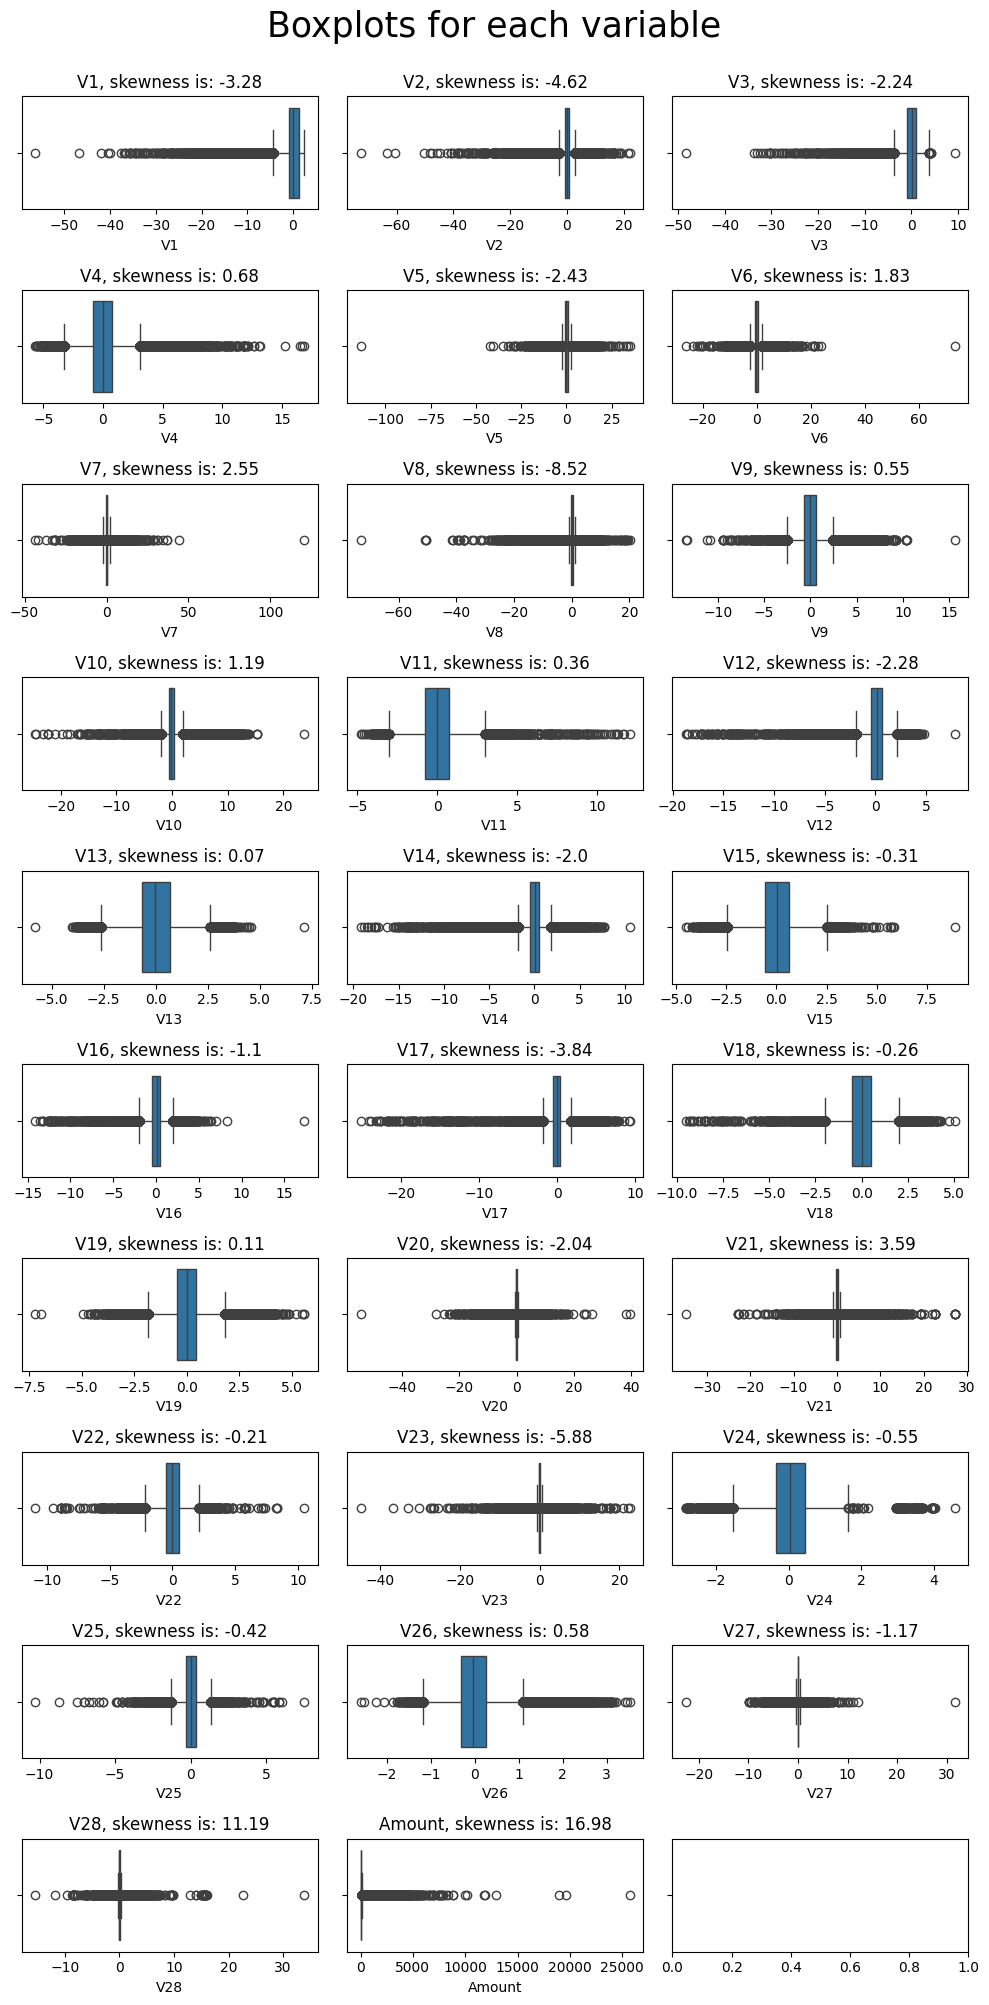

In [ ]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(10,20))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [ ]:
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
    return outliers

def drop_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]
    return df

outlier_df = df.copy()
for col in numeric_columns:
    outlier_df = drop_outliers(outlier_df, col)

In [ ]:
print(df['Class'].value_counts()[1])
print(outlier_df['Class'].value_counts()[1])

492
13


#Split and scale data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [ ]:
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
X_train['Time'] = standard_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_train['Amount'] = robust_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))

X_test['Time'] = standard_scaler.transform(X_test['Time'].values.reshape(-1,1))
X_test['Amount'] = robust_scaler.transform(X_test['Amount'].values.reshape(-1,1))

In [ ]:
X_train[['V1','V21','Time','Amount']].describe()

,V1,V21,Time,Amount
count,199364.000000,199364.000000,1.993640e+05,199364.000000
mean,-0.001137,0.000459,-1.055671e-16,0.924193
std,1.965794,0.740233,1.000003e+00,3.523125
min,-56.407510,-34.830382,-1.998286e+00,-0.306279
25%,-0.919472,-0.228438,-8.558564e-01,-0.227342
50%,0.017529,-0.029121,-2.116814e-01,0.000000
75%,1.315404,0.186562,9.363437e-01,0.772658
max,2.451888,27.202839,1.640221e+00,357.359877


#Training and evaluate model

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.pipeline import Pipeline
import joblib

In [ ]:
def train_model(clf, X_train, y_train, resampler=None, filename=None):
    steps = []
    if resampler:
        steps.append(('resampling', resampler))
    steps.append(('classification', clf))
    pipeline = Pipeline(steps)

    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_train_pred = pipeline.predict(X_train)
    y_train_proba = pipeline.predict_proba(X_train)[:, 1] if hasattr(pipeline, "predict_proba") else None

    train_report = classification_report(y_train, y_train_pred, digits=4)

    train_roc_auc = roc_auc_score(y_train, y_train_proba)

    model_info = {
        'train_report': train_report,
        'train_roc_auc': train_roc_auc,
        'training_time': training_time,
        'pipeline': pipeline
    }

    if filename:
        joblib.dump(model_info, filename)

    print("Training Report:")
    print(train_report)
    if( train_roc_auc is not None):
      print(f"Train Set ROC AUC: {train_roc_auc:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")

In [ ]:
def evaluate_model(pipeline, X_test, y_test):
    y_test_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    test_report = classification_report(y_test, y_test_pred, digits=4)
    test_roc_auc= roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    cm = confusion_matrix(y_test, y_test_pred)


    test_info = {
        'test_report': test_report,
        'test_roc_auc': test_roc_auc,
        'confusion_matrix': cm
    }

    print("Classification Report:")
    print(test_report)
    if( test_roc_auc is not None):
      print(f"Test Set ROC AUC: {test_roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)


#No Resampling

In [ ]:
train_model(LogisticRegression(C=1.0, max_iter=1000, solver='liblinear'), X_train, y_train, filename = 'LR.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9994    0.9999    0.9996    199020
           1     0.8876    0.6424    0.7454       344

    accuracy                         0.9992    199364
   macro avg     0.9435    0.8212    0.8725    199364
weighted avg     0.9992    0.9992    0.9992    199364

Train Set ROC AUC: 0.9852
Training Time: 7.1702 seconds


In [ ]:
logistic_regression = joblib.load('LR.pkl')
evaluate_model(logistic_regression['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8598    0.6216    0.7216       148

    accuracy                         0.9992     85443
   macro avg     0.9296    0.8107    0.8606     85443
weighted avg     0.9991    0.9992    0.9991     85443

Test Set ROC AUC: 0.9545
Confusion Matrix:
[[85280    15]
 [   56    92]]


In [ ]:
train_model(DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=4), X_train, y_train, filename = 'DT.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998    199020
           1     0.9627    0.8256    0.8889       344

    accuracy                         0.9996    199364
   macro avg     0.9812    0.9128    0.9444    199364
weighted avg     0.9996    0.9996    0.9996    199364

Train Set ROC AUC: 0.9999
Training Time: 39.2681 seconds


In [ ]:
decision_tree = joblib.load('DT.pkl')
evaluate_model(decision_tree['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996     85295
           1     0.8217    0.7162    0.7653       148

    accuracy                         0.9992     85443
   macro avg     0.9106    0.8580    0.8825     85443
weighted avg     0.9992    0.9992    0.9992     85443

Test Set ROC AUC: 0.8917
Confusion Matrix:
[[85272    23]
 [   42   106]]


In [ ]:
train_model(RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=4, n_jobs=-1), X_train, y_train, filename = 'RF.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998    199020
           1     0.9794    0.8285    0.8976       344

    accuracy                         0.9997    199364
   macro avg     0.9895    0.9142    0.9487    199364
weighted avg     0.9997    0.9997    0.9997    199364

Train Set ROC AUC: 1.0000
Training Time: 397.7126 seconds


In [ ]:
random_forest = joblib.load('RF.pkl')
evaluate_model(random_forest['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     85295
           1     0.9407    0.7500    0.8346       148

    accuracy                         0.9995     85443
   macro avg     0.9701    0.8750    0.9172     85443
weighted avg     0.9995    0.9995    0.9995     85443

Test Set ROC AUC: 0.9623
Confusion Matrix:
[[85288     7]
 [   37   111]]


In [ ]:
train_model(xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss', objective='binary:logistic'), X_train, y_train, filename = 'XGB.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    1.0000    1.0000    199020
           1     1.0000    0.9535    0.9762       344

    accuracy                         0.9999    199364
   macro avg     1.0000    0.9767    0.9881    199364
weighted avg     0.9999    0.9999    0.9999    199364

Train Set ROC AUC: 1.0000
Training Time: 3.7384 seconds


In [ ]:
xgboost = joblib.load('XGB.pkl')
evaluate_model(xgboost['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     85295
           1     0.9655    0.7568    0.8485       148

    accuracy                         0.9995     85443
   macro avg     0.9825    0.8784    0.9241     85443
weighted avg     0.9995    0.9995    0.9995     85443

Test Set ROC AUC: 0.9673
Confusion Matrix:
[[85291     4]
 [   36   112]]


#Random Undersampling




In [ ]:
train_model(LogisticRegression(C=1.0, max_iter=1000, solver='liblinear'), X_train, y_train, resampler=RandomUnderSampler(sampling_strategy='majority'), filename = 'LR_RUS.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    0.9588    0.9789    199020
           1     0.0382    0.9448    0.0733       344

    accuracy                         0.9588    199364
   macro avg     0.5190    0.9518    0.5261    199364
weighted avg     0.9982    0.9588    0.9774    199364

Train Set ROC AUC: 0.9878
Training Time: 0.0556 seconds


In [ ]:
lr_rus = joblib.load('LR_RUS.pkl')
evaluate_model(lr_rus['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9594    0.9792     85295
           1     0.0364    0.8851    0.0699       148

    accuracy                         0.9592     85443
   macro avg     0.5181    0.9222    0.5245     85443
weighted avg     0.9981    0.9592    0.9776     85443

Test Set ROC AUC: 0.9668
Confusion Matrix:
[[81828  3467]
 [   17   131]]


In [ ]:
train_model(DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=4), X_train, y_train, resampler=RandomUnderSampler(sampling_strategy='majority'), filename = 'DT_RUS.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9200    0.9583    199020
           1     0.0206    0.9738    0.0404       344

    accuracy                         0.9201    199364
   macro avg     0.5103    0.9469    0.4993    199364
weighted avg     0.9983    0.9201    0.9567    199364

Train Set ROC AUC: 0.9722
Training Time: 0.0717 seconds


In [ ]:
dt_rus = joblib.load('DT_RUS.pkl')
evaluate_model(dt_rus['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9200    0.9582     85295
           1     0.0190    0.8919    0.0372       148

    accuracy                         0.9200     85443
   macro avg     0.5094    0.9059    0.4977     85443
weighted avg     0.9981    0.9200    0.9566     85443

Test Set ROC AUC: 0.9229
Confusion Matrix:
[[78472  6823]
 [   16   132]]


In [ ]:
train_model(RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=4, n_jobs=-1),X_train,y_train, filename = 'RF_RUS.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998    199020
           1     0.9694    0.8285    0.8934       344

    accuracy                         0.9997    199364
   macro avg     0.9845    0.9142    0.9466    199364
weighted avg     0.9997    0.9997    0.9996    199364

Train Set ROC AUC: 1.0000
Training Time: 268.3384 seconds


In [ ]:
rf_rus = joblib.load('RF_RUS.pkl')
evaluate_model(rf_rus['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     85295
           1     0.9407    0.7500    0.8346       148

    accuracy                         0.9995     85443
   macro avg     0.9701    0.8750    0.9172     85443
weighted avg     0.9995    0.9995    0.9995     85443

Test Set ROC AUC: 0.9568
Confusion Matrix:
[[85288     7]
 [   37   111]]


In [ ]:
train_model(xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss'), X_train, y_train, resampler=RandomUnderSampler(sampling_strategy='majority'), filename = 'XGB_RUS.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9669    0.9832    199020
           1     0.0496    1.0000    0.0945       344

    accuracy                         0.9669    199364
   macro avg     0.5248    0.9834    0.5389    199364
weighted avg     0.9984    0.9669    0.9816    199364

Train Set ROC AUC: 0.9978
Training Time: 0.3454 seconds


In [ ]:
xgb_rus = joblib.load('XGB_RUS.pkl')
evaluate_model(xgb_rus['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9667    0.9830     85295
           1     0.0448    0.8986    0.0853       148

    accuracy                         0.9666     85443
   macro avg     0.5223    0.9327    0.5342     85443
weighted avg     0.9982    0.9666    0.9814     85443

Test Set ROC AUC: 0.9692
Confusion Matrix:
[[82458  2837]
 [   15   133]]


#Nearmiss

In [ ]:
train_model(LogisticRegression(C=1.0, max_iter=1000, solver = 'liblinear'), X_train, y_train, resampler=NearMiss(version=1), filename = 'LR_NM1.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    0.5800    0.7341    199020
           1     0.0039    0.9564    0.0078       344

    accuracy                         0.5806    199364
   macro avg     0.5019    0.7682    0.3710    199364
weighted avg     0.9982    0.5806    0.7329    199364

Train Set ROC AUC: 0.9075
Training Time: 1.7225 seconds


In [ ]:
lr_nm1 = joblib.load('LR_NM1.pkl')
evaluate_model(lr_nm1['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.5794    0.7337     85295
           1     0.0039    0.9392    0.0077       148

    accuracy                         0.5801     85443
   macro avg     0.5018    0.7593    0.3707     85443
weighted avg     0.9981    0.5801    0.7324     85443

Test Set ROC AUC: 0.9063
Confusion Matrix:
[[49424 35871]
 [    9   139]]


In [ ]:
train_model(DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=4), X_train, y_train, resampler=NearMiss(version=1), filename = 'DT_NM1.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    0.3714    0.5416    199020
           1     0.0027    0.9797    0.0054       344

    accuracy                         0.3724    199364
   macro avg     0.5013    0.6755    0.2735    199364
weighted avg     0.9982    0.3724    0.5407    199364

Train Set ROC AUC: 0.7014
Training Time: 0.9318 seconds


In [ ]:
lr_nm1 = joblib.load('DT_NM1.pkl')
evaluate_model(lr_nm1['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.3708    0.5410     85295
           1     0.0026    0.9527    0.0052       148

    accuracy                         0.3719     85443
   macro avg     0.5012    0.6618    0.2731     85443
weighted avg     0.9981    0.3719    0.5401     85443

Test Set ROC AUC: 0.6854
Confusion Matrix:
[[31631 53664]
 [    7   141]]


In [ ]:
train_model(RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=4, n_jobs=-1), X_train, y_train, resampler=NearMiss(version=1), filename = 'RF_NM1.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9998    0.2013    0.3351    199020
           1     0.0021    0.9767    0.0042       344

    accuracy                         0.2026    199364
   macro avg     0.5010    0.5890    0.1696    199364
weighted avg     0.9981    0.2026    0.3345    199364

Train Set ROC AUC: 0.9521
Training Time: 1.3457 seconds


In [ ]:
rf_nm1 = joblib.load('RF_NM1.pkl')
evaluate_model(rf_nm1['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.2006    0.3342     85295
           1     0.0021    0.9662    0.0042       148

    accuracy                         0.2020     85443
   macro avg     0.5009    0.5834    0.1692     85443
weighted avg     0.9980    0.2020    0.3336     85443

Test Set ROC AUC: 0.9101
Confusion Matrix:
[[17113 68182]
 [    5   143]]


In [ ]:
train_model(xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss'), X_train, y_train, resampler=NearMiss(version=1), filename = 'XGB_NM1.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.1406    0.2465    199020
           1     0.0020    1.0000    0.0040       344

    accuracy                         0.1421    199364
   macro avg     0.5010    0.5703    0.1253    199364
weighted avg     0.9983    0.1421    0.2461    199364

Train Set ROC AUC: 0.9315
Training Time: 1.1785 seconds


In [ ]:
xgb_nm1 = joblib.load('XGB_NM1.pkl')
evaluate_model(xgb_nm1['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.1386    0.2434     85295
           1     0.0019    0.9662    0.0039       148

    accuracy                         0.1400     85443
   macro avg     0.5008    0.5524    0.1237     85443
weighted avg     0.9978    0.1400    0.2430     85443

Test Set ROC AUC: 0.8710
Confusion Matrix:
[[11822 73473]
 [    5   143]]


#Tomek Link

In [ ]:
train_model(LogisticRegression(C=1.0, max_iter=1000, solver = 'liblinear'), X_train, y_train, resampler=TomekLinks(sampling_strategy='auto'), filename = 'LR_TL.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9994    0.9999    0.9996    199020
           1     0.8893    0.6541    0.7538       344

    accuracy                         0.9993    199364
   macro avg     0.9444    0.8270    0.8767    199364
weighted avg     0.9992    0.9993    0.9992    199364

Train Set ROC AUC: 0.9852
Training Time: 300.8212 seconds


In [ ]:
lr_tl = joblib.load('LR_TL.pkl')
evaluate_model(lr_tl['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8611    0.6284    0.7266       148

    accuracy                         0.9992     85443
   macro avg     0.9302    0.8141    0.8631     85443
weighted avg     0.9991    0.9992    0.9991     85443

Test Set ROC AUC: 0.9547
Confusion Matrix:
[[85280    15]
 [   55    93]]


In [ ]:
train_model(DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=4), X_train, y_train, resampler=TomekLinks(sampling_strategy='auto'), filename = 'DT_TL.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998    199020
           1     0.9659    0.8227    0.8885       344

    accuracy                         0.9996    199364
   macro avg     0.9828    0.9113    0.9442    199364
weighted avg     0.9996    0.9996    0.9996    199364

Train Set ROC AUC: 0.9999
Training Time: 324.5523 seconds


In [ ]:
dt_tl = joblib.load('DT_TL.pkl')
evaluate_model(dt_tl['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     85295
           1     0.8548    0.7162    0.7794       148

    accuracy                         0.9993     85443
   macro avg     0.9272    0.8580    0.8895     85443
weighted avg     0.9993    0.9993    0.9993     85443

Test Set ROC AUC: 0.8917
Confusion Matrix:
[[85277    18]
 [   42   106]]


In [ ]:
train_model(RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=4, n_jobs=-1), X_train, y_train, resampler=TomekLinks(sampling_strategy='auto'), filename = 'RF_TL.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998    199020
           1     0.9663    0.8343    0.8955       344

    accuracy                         0.9997    199364
   macro avg     0.9830    0.9171    0.9477    199364
weighted avg     0.9997    0.9997    0.9997    199364

Train Set ROC AUC: 1.0000
Training Time: 563.1356 seconds


In [ ]:
rf_tl = joblib.load('RF_TL.pkl')
evaluate_model(rf_tl['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     85295
           1     0.9262    0.7635    0.8370       148

    accuracy                         0.9995     85443
   macro avg     0.9629    0.8817    0.9184     85443
weighted avg     0.9995    0.9995    0.9995     85443

Test Set ROC AUC: 0.9701
Confusion Matrix:
[[85286     9]
 [   35   113]]


In [ ]:
train_model(xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss'), X_train, y_train, resampler=TomekLinks(sampling_strategy='auto'), filename = 'XGB_TL.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999    199020
           1     0.9819    0.9477    0.9645       344

    accuracy                         0.9999    199364
   macro avg     0.9909    0.9738    0.9822    199364
weighted avg     0.9999    0.9999    0.9999    199364

Train Set ROC AUC: 1.0000
Training Time: 295.1815 seconds


In [ ]:
xgb_tl = joblib.load('XGB_TL.pkl')
evaluate_model(xgb_tl['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     85295
           1     0.9174    0.7500    0.8253       148

    accuracy                         0.9994     85443
   macro avg     0.9585    0.8749    0.9125     85443
weighted avg     0.9994    0.9994    0.9994     85443

Test Set ROC AUC: 0.9633
Confusion Matrix:
[[85285    10]
 [   37   111]]


#Random Oversampling

In [ ]:
train_model(LogisticRegression(C=1.0, max_iter=1000, solver = 'liblinear'), X_train, y_train, resampler=RandomOverSampler(sampling_strategy='minority'), filename = 'LR_ROS.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    0.9795    0.9896    199020
           1     0.0726    0.9302    0.1347       344

    accuracy                         0.9794    199364
   macro avg     0.5363    0.9549    0.5622    199364
weighted avg     0.9983    0.9794    0.9881    199364

Train Set ROC AUC: 0.9916
Training Time: 9.2526 seconds


In [ ]:
lr_ros = joblib.load('LR_ROS.pkl')
evaluate_model(lr_ros['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9790    0.9893     85295
           1     0.0676    0.8784    0.1255       148

    accuracy                         0.9788     85443
   macro avg     0.5337    0.9287    0.5574     85443
weighted avg     0.9982    0.9788    0.9878     85443

Test Set ROC AUC: 0.9679
Confusion Matrix:
[[83501  1794]
 [   18   130]]


In [ ]:
train_model(DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=4), X_train, y_train, resampler=RandomOverSampler(sampling_strategy='minority'), filename = 'DT_ROS.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999    199020
           1     0.9149    1.0000    0.9556       344

    accuracy                         0.9998    199364
   macro avg     0.9574    0.9999    0.9777    199364
weighted avg     0.9999    0.9998    0.9998    199364

Train Set ROC AUC: 1.0000
Training Time: 18.2180 seconds


In [ ]:
dt_ros = joblib.load('DT_ROS.pkl')
evaluate_model(dt_ros['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9994    0.9995     85295
           1     0.6797    0.7027    0.6910       148

    accuracy                         0.9989     85443
   macro avg     0.8396    0.8511    0.8452     85443
weighted avg     0.9989    0.9989    0.9989     85443

Test Set ROC AUC: 0.8511
Confusion Matrix:
[[85246    49]
 [   44   104]]


In [ ]:
train_model(RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=4, n_jobs=-1), X_train, y_train, resampler=RandomOverSampler(sampling_strategy='minority'), filename = 'RF_ROS.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9999    0.9999    199020
           1     0.9322    1.0000    0.9649       344

    accuracy                         0.9999    199364
   macro avg     0.9661    0.9999    0.9824    199364
weighted avg     0.9999    0.9999    0.9999    199364

Train Set ROC AUC: 1.0000
Training Time: 204.9468 seconds


In [ ]:
rf_ros = joblib.load('RF_ROS.pkl')
evaluate_model(rf_ros['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8819    0.7568    0.8145       148

    accuracy                         0.9994     85443
   macro avg     0.9407    0.8783    0.9071     85443
weighted avg     0.9994    0.9994    0.9994     85443

Test Set ROC AUC: 0.9426
Confusion Matrix:
[[85280    15]
 [   36   112]]


In [ ]:
train_model(xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss'), X_train, y_train, resampler=RandomOverSampler(sampling_strategy='minority'), filename = 'XGB_ROS.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999    199020
           1     0.9005    1.0000    0.9477       344

    accuracy                         0.9998    199364
   macro avg     0.9503    0.9999    0.9738    199364
weighted avg     0.9998    0.9998    0.9998    199364

Train Set ROC AUC: 1.0000
Training Time: 10.2764 seconds


In [ ]:
xgb_ros = joblib.load('XGB_ROS.pkl')
evaluate_model(xgb_ros['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     85295
           1     0.8042    0.7770    0.7904       148

    accuracy                         0.9993     85443
   macro avg     0.9019    0.8883    0.8950     85443
weighted avg     0.9993    0.9993    0.9993     85443

Test Set ROC AUC: 0.9694
Confusion Matrix:
[[85267    28]
 [   33   115]]


#SMOTE

In [ ]:
train_model(LogisticRegression(C=1.0, max_iter=1000, solver = 'liblinear'), X_train, y_train, resampler=SMOTE(sampling_strategy='minority'), filename = 'LR_SMOTE.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    0.9782    0.9889    199020
           1     0.0692    0.9390    0.1289       344

    accuracy                         0.9781    199364
   macro avg     0.5345    0.9586    0.5589    199364
weighted avg     0.9983    0.9781    0.9874    199364

Train Set ROC AUC: 0.9908
Training Time: 9.6495 seconds


In [ ]:
lr_smote = joblib.load('LR_SMOTE.pkl')
evaluate_model(lr_smote['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9781    0.9888     85295
           1     0.0650    0.8784    0.1211       148

    accuracy                         0.9779     85443
   macro avg     0.5324    0.9282    0.5550     85443
weighted avg     0.9982    0.9779    0.9873     85443

Test Set ROC AUC: 0.9661
Confusion Matrix:
[[83426  1869]
 [   18   130]]


In [ ]:
train_model(DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=4), X_train, y_train, resampler=SMOTE(sampling_strategy='minority'), filename = 'DT_SMOTE.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    0.9996    0.9998    199020
           1     0.8000    0.9651    0.8748       344

    accuracy                         0.9995    199364
   macro avg     0.9000    0.9823    0.9373    199364
weighted avg     0.9996    0.9995    0.9995    199364

Train Set ROC AUC: 1.0000
Training Time: 64.0514 seconds


In [ ]:
dt_smote = joblib.load('DT_SMOTE.pkl')
evaluate_model(dt_smote['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9981    0.9988     85295
           1     0.4022    0.7500    0.5236       148

    accuracy                         0.9976     85443
   macro avg     0.7009    0.8740    0.7612     85443
weighted avg     0.9985    0.9976    0.9980     85443

Test Set ROC AUC: 0.8908
Confusion Matrix:
[[85130   165]
 [   37   111]]


In [ ]:
train_model(RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=4, n_jobs=-1), X_train, y_train, resampler=SMOTE(sampling_strategy='minority'), filename = 'RF_SMOTE.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999    199020
           1     0.8798    1.0000    0.9361       344

    accuracy                         0.9998    199364
   macro avg     0.9399    0.9999    0.9680    199364
weighted avg     0.9998    0.9998    0.9998    199364

Train Set ROC AUC: 1.0000
Training Time: 447.2312 seconds


In [ ]:
rf_smote = joblib.load('RF_SMOTE.pkl')
evaluate_model(rf_smote['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     85295
           1     0.7628    0.8041    0.7829       148

    accuracy                         0.9992     85443
   macro avg     0.8812    0.9018    0.8913     85443
weighted avg     0.9992    0.9992    0.9992     85443

Test Set ROC AUC: 0.9650
Confusion Matrix:
[[85258    37]
 [   29   119]]


In [ ]:
train_model(xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss'), X_train, y_train, resampler=SMOTE(sampling_strategy='minority'), filename = 'XGB_SMOTE.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9983    0.9992    199020
           1     0.5089    1.0000    0.6745       344

    accuracy                         0.9983    199364
   macro avg     0.7544    0.9992    0.8368    199364
weighted avg     0.9992    0.9983    0.9986    199364

Train Set ROC AUC: 1.0000
Training Time: 11.6207 seconds


In [ ]:
xgb_smote = joblib.load('XGB_SMOTE.pkl')
evaluate_model(xgb_smote['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9974    0.9986     85295
           1     0.3576    0.8311    0.5000       148

    accuracy                         0.9971     85443
   macro avg     0.6786    0.9142    0.7493     85443
weighted avg     0.9986    0.9971    0.9977     85443

Test Set ROC AUC: 0.9715
Confusion Matrix:
[[85074   221]
 [   25   123]]


#ADASYN

In [ ]:
train_model(LogisticRegression(C=1.0, max_iter=1000, solver = 'liblinear'), X_train, y_train, resampler=ADASYN(sampling_strategy='minority'), filename = 'LR_ADASYN.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    0.9342    0.9659    199020
           1     0.0247    0.9651    0.0482       344

    accuracy                         0.9342    199364
   macro avg     0.5123    0.9497    0.5071    199364
weighted avg     0.9983    0.9342    0.9644    199364

Train Set ROC AUC: 0.9914
Training Time: 13.2990 seconds


In [ ]:
lr_adaysyn = joblib.load('LR_ADASYN.pkl')
evaluate_model(lr_adaysyn['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9338    0.9657     85295
           1     0.0232    0.9054    0.0452       148

    accuracy                         0.9337     85443
   macro avg     0.5115    0.9196    0.5054     85443
weighted avg     0.9981    0.9337    0.9641     85443

Test Set ROC AUC: 0.9659
Confusion Matrix:
[[79646  5649]
 [   14   134]]


In [ ]:
train_model(DecisionTreeClassifier(max_depth=None, min_samples_split=5, min_samples_leaf=4), X_train, y_train, resampler=ADASYN(sampling_strategy='minority'), filename = 'DT_ADASYN.pkl')

Training Report:
              precision    recall  f1-score   support

           0     0.9999    0.9995    0.9997    199020
           1     0.7635    0.9477    0.8457       344

    accuracy                         0.9994    199364
   macro avg     0.8817    0.9736    0.9227    199364
weighted avg     0.9995    0.9994    0.9994    199364

Train Set ROC AUC: 0.9999
Training Time: 69.3648 seconds


In [ ]:
dt_adasyn = joblib.load('DT_ADASYN.pkl')
evaluate_model(dt_adasyn['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9995    0.9978    0.9987     85295
           1     0.3576    0.6959    0.4725       148

    accuracy                         0.9973     85443
   macro avg     0.6786    0.8469    0.7356     85443
weighted avg     0.9984    0.9973    0.9977     85443

Test Set ROC AUC: 0.8670
Confusion Matrix:
[[85110   185]
 [   45   103]]


In [ ]:
train_model(RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=20, min_samples_split=5, min_samples_leaf=4, n_jobs=-1), X_train, y_train, resampler=ADASYN(sampling_strategy='minority'), filename = 'RF_ADASYN.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9988    0.9994    199020
           1     0.5931    1.0000    0.7446       344

    accuracy                         0.9988    199364
   macro avg     0.7966    0.9994    0.8720    199364
weighted avg     0.9993    0.9988    0.9990    199364

Train Set ROC AUC: 1.0000
Training Time: 398.1834 seconds


In [ ]:
rf_adasyn = joblib.load('RF_ADASYN.pkl')
evaluate_model(rf_adasyn['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9988    0.9992     85295
           1     0.5342    0.7905    0.6376       148

    accuracy                         0.9984     85443
   macro avg     0.7669    0.8947    0.8184     85443
weighted avg     0.9988    0.9984    0.9986     85443

Test Set ROC AUC: 0.9694
Confusion Matrix:
[[85193   102]
 [   31   117]]


In [ ]:
train_model(xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss'), X_train, y_train, resampler=ADASYN(sampling_strategy='minority'), filename = 'XGB_ADASYN.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9969    0.9984    199020
           1     0.3554    1.0000    0.5244       344

    accuracy                         0.9969    199364
   macro avg     0.6777    0.9984    0.7614    199364
weighted avg     0.9989    0.9969    0.9976    199364

Train Set ROC AUC: 1.0000
Training Time: 11.1236 seconds


In [ ]:
xgb_adasyn = joblib.load('XGB_ADASYN.pkl')
evaluate_model(xgb_adasyn['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9958    0.9977     85295
           1     0.2542    0.8243    0.3885       148

    accuracy                         0.9955     85443
   macro avg     0.6269    0.9101    0.6931     85443
weighted avg     0.9984    0.9955    0.9967     85443

Test Set ROC AUC: 0.9727
Confusion Matrix:
[[84937   358]
 [   26   122]]


#Hybrid

In [ ]:
train_model(xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, eval_metric='logloss',scale_pos_weight=1),X_train,y_train, resampler=SMOTETomek(sampling_strategy='auto'), filename='smotetomek_xgb.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9982    0.9991    199020
           1     0.4893    1.0000    0.6571       344

    accuracy                         0.9982    199364
   macro avg     0.7447    0.9991    0.8281    199364
weighted avg     0.9991    0.9982    0.9985    199364

Train Set ROC AUC: 1.0000
Training Time: 1161.0057 seconds


In [ ]:
smotetomek_xgb = joblib.load('smotetomek_xgb.pkl')
evaluate_model(smotetomek_xgb['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9974    0.9986     85295
           1     0.3634    0.8446    0.5081       148

    accuracy                         0.9972     85443
   macro avg     0.6816    0.9210    0.7534     85443
weighted avg     0.9986    0.9972    0.9977     85443

Test Set ROC AUC: 0.9715
Confusion Matrix:
[[85076   219]
 [   23   125]]


In [ ]:
train_model(RandomForestClassifier(n_estimators=100,max_features='sqrt',max_depth=20,min_samples_split=5,class_weight='balanced', n_jobs=-1), X_train, y_train, resampler=SMOTETomek(sampling_strategy='auto'), filename='smotetomek_rf.pkl')

Training Report:
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000    199020
           1     0.9556    1.0000    0.9773       344

    accuracy                         0.9999    199364
   macro avg     0.9778    1.0000    0.9886    199364
weighted avg     0.9999    0.9999    0.9999    199364

Train Set ROC AUC: 1.0000
Training Time: 1485.4643 seconds


In [ ]:
rf_smotetomek = joblib.load('smotetomek_rf.pkl')
evaluate_model(rf_smotetomek['pipeline'], X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     85295
           1     0.8027    0.7973    0.8000       148

    accuracy                         0.9993     85443
   macro avg     0.9012    0.8985    0.8998     85443
weighted avg     0.9993    0.9993    0.9993     85443

Test Set ROC AUC: 0.9625
Confusion Matrix:
[[85266    29]
 [   30   118]]


#Check distribution

In [ ]:
y_train_distribution = {
    'Class 0': y_train.value_counts()[0],
    'Class 1': y_train.value_counts()[1]
}
y_test_distribution = {
    'Class 0': y_test.value_counts()[0],
    'Class 1': y_test.value_counts()[1]
}
print("Class distribution in Training Set:", y_train_distribution)
print("Class distribution in Testing Set:", y_test_distribution)

Class distribution in Training Set: {'Class 0': 199020, 'Class 1': 344}
Class distribution in Testing Set: {'Class 0': 85295, 'Class 1': 148}


In [ ]:
def check_resampled_distribution(X, y, resampler):
    X_resampled, y_resampled = resampler.fit_resample(X, y)
    class_distribution = {
        'Class 0': y_resampled.value_counts()[0],
        'Class 1': y_resampled.value_counts()[1]
    }
    return class_distribution

In [ ]:
#RUS
rus_resampler = RandomUnderSampler(sampling_strategy='majority')
rus_train_distribution = check_resampled_distribution(X_train, y_train, rus_resampler)
print("Class distribution after RandomUnderSampler:", rus_train_distribution)
#NearMiss
nm_resampler = NearMiss(version=1)
nm_train_distribution = check_resampled_distribution(X_train, y_train, nm_resampler)
print("Class distribution after NearMiss:", nm_train_distribution)
#TomekLink
tl_resampler = TomekLinks(sampling_strategy='auto')
tl_train_distribution = check_resampled_distribution(X_train, y_train, tl_resampler)
print("Class distribution after TomekLinks:", tl_train_distribution)
#ROS
ros_resampler = RandomOverSampler(sampling_strategy='minority')
ros_train_distribution = check_resampled_distribution(X_train, y_train, ros_resampler)
print("Class distribution after RandomOverSampling:", ros_train_distribution)
#SMOTE
smote_resampler = SMOTE(sampling_strategy='minority')
smote_train_distribution = check_resampled_distribution(X_train, y_train, smote_resampler)
print("Class distribution after SMOTE:", smote_train_distribution)
#ADSYN
adasyn_resampler = ADASYN(sampling_strategy='minority')
adasyn_train_distribution = check_resampled_distribution(X_train, y_train, adasyn_resampler)
print("Class distribution after ADASYN:", adasyn_train_distribution)
#SMOTETomek
smotetomek_resampler = SMOTETomek(sampling_strategy='auto')
smotetomek_train_distribution = check_resampled_distribution(X_train, y_train, smotetomek_resampler)

Class distribution after RandomUnderSampler: {'Class 0': 344, 'Class 1': 344}
Class distribution after NearMiss: {'Class 0': 344, 'Class 1': 344}
Class distribution after TomekLinks: {'Class 0': 199002, 'Class 1': 344}
Class distribution after RandomOverSampling: {'Class 0': 199020, 'Class 1': 199020}
Class distribution after SMOTE: {'Class 0': 199020, 'Class 1': 199020}
Class distribution after ADASYN: {'Class 0': 199020, 'Class 1': 198975}


In [ ]:
print("Class distribution after SMOTETomek:", smotetomek_train_distribution)

Class distribution after SMOTETomek: {'Class 0': 199020, 'Class 1': 199020}
